In [1]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os

# [IAPR][iapr]: Project


**Group ID:** 15

**Author 1 (sciper):** Tom Mery (297217)  
**Author 2 (sciper):** Gabriel Margaria (299895)   
**Author 3 (sciper):** Théo Hermann (282844)   

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:


![train_00.png](data_project/project_description/train_00.png)

### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="data_project/project_description/solution_example.png" width="512"/>
Solution 2
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each inpute image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image. and M images, that are Each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [2]:
## load images
import os 
from PIL import Image


import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_input_image(image_index ,  folder ="train2" , path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder , filename )
    
    im= Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers  , folder ="train2" , path = "data_project"  ,group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)

In [4]:
def solve_and_export_puzzles_image(image_index , folder = "train2" , path = "data_project"  , group_id = "00"):
    """
    Wrapper funciton to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
    
    
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

data_project/train2_solution_06


In [5]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)


solving  6
data_project/train2_solution_00
solving  10
data_project/train2_solution_00


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 


## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$


# Segmentation

In [6]:
import cv2
import numpy as np

def segment(image):
    """
    Segments the puzzle pieces from the background of an input image.

    Args:
        image: A numpy array representing the input image.

    Returns:
        A binary image where the puzzle pieces are represented by 1 and the background is represented by 0.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the grayscale image to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply binary thresholding to the blurred image to segment the puzzle pieces
    # Otsu's method is used to determine the threshold value automatically
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # Create a square structuring element for morphological closing operation
    kernel = np.ones((25, 25), np.uint8)

    # Perform morphological closing operation to fill in any gaps or holes in the thresholded image
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Convert the closing output to a binary image where the puzzle pieces are represented by 1 and the background is represented by 0
    segmented = closing / 255

    # Return the segmented image
    return segmented.astype(np.uint8)


def get_rectangles(segmented, height=128, width=128):
    # Find contours
    contours = cv2.findContours(segmented, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    target_area = height*width
    max_err = 0.1     # + ou - 10%

    # Compute rotated rectangle (minimum area)
    rectangles = []
    angles = []
    for cnt in contours:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        area = cv2.contourArea(box)
        if (area > (1-max_err)*target_area) and (area < (1+max_err)*target_area): 
            rectangles.append(rect)
    
    return rectangles


def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    diag = int(np.ceil(np.sqrt(h**2 + w**2)))
    
    padded = np.zeros((diag, diag, 3), dtype=image.dtype)
    
    yoff = round((diag-h)/2)
    xoff = round((diag-w)/2)
    padded[yoff:yoff+h, xoff:xoff+w, :] = image.copy()
    
    center = (diag / 2, diag / 2)
    M = cv2.getRotationMatrix2D(center,angle,1.0)
    rotated_image = cv2.warpAffine(padded, M, (diag,diag))
    return rotated_image


def crop_image(image, rect):
    box = np.int0(cv2.boxPoints(rect))
    x_min, y_min = np.min(box, axis=0)
    x_max, y_max = np.max(box, axis=0)
    x1 = max(0, x_min)
    y1 = max(0, y_min)
    x2 = min(image.shape[1], x_max)
    y2 = min(image.shape[0], y_max)
    cropped = image[y1:y2, x1:x2]
    return cropped


class Piece:
    def __init__(self, data):
        self.original = data
        self.data = self.original.copy()
        
        self.top = None
        self.right = None
        self.bottom = None
        self.left = None
        
        self.top_affinity = np.inf
        self.right_affinity = np.inf
        self.bottom_affinity = np.inf
        self.left_affinity = np.inf
        self.score = np.inf
    
    def rotate(self, k, update_neighbors=False):
        self.data = np.rot90(self.original, k=k)
        
        if update_neighbors:
            if k==1:
                self.left, self.bottom, self.right, self.top = self.top, self.left, self.bottom, self.right
                self.left_affinity, self.bottom_affinity, self.right_affinity, self.top_affinity = self.top_affinity, self.left_affinity, self.bottom_affinity, self.right_affinity
            elif k==2:
                self.bottom, self.right, self.top, self.left = self.top, self.left, self.bottom, self.right
                self.bottom_affinity, self.right_affinity, self.top_affinity, self.left_affinity = self.top_affinity, self.left_affinity, self.bottom_affinity, self.right_affinity
            elif k==3: 
                self.right, self.top, self.left, self.bottom = self.top, self.left, self.bottom, self.right
                self.right_affinity, self.top_affinity, self.left_affinity, self.bottom_affinity = self.top_affinity, self.left_affinity, self.bottom_affinity, self.right_affinity


def get_piece(image, rect, height=128, width=128):
    # Crop image 
    data = crop_image(image, rect)
    
    # Rotate piece
    angle = rect[2]
    data = rotate_image(data, angle)
    
    # Crop rotated piece
    center = (int(data.shape[0]/2), int(data.shape[1]/2))
    x1 = center[1] - int(width/2)
    y1 = center[0] - int(height/2)
    x2 = center[1] + int(width/2)
    y2 = center[0] + int(height/2)
    data = data[y1:y2, x1:x2]
    
    piece = Piece(data=data)

    return piece

In [7]:
# Load image, grayscale, Gaussian blur, Otsu's threshold
image = load_input_image(image_index=3)

segmented = segment(image)
rectangles = get_rectangles(segmented)

pieces = []
for rect in rectangles:
    pieces.append(get_piece(image, rect))

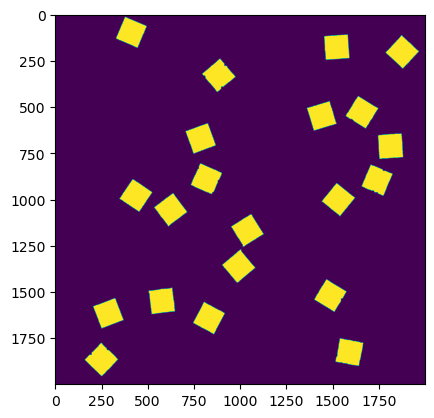

In [8]:
plt.imshow(segmented)

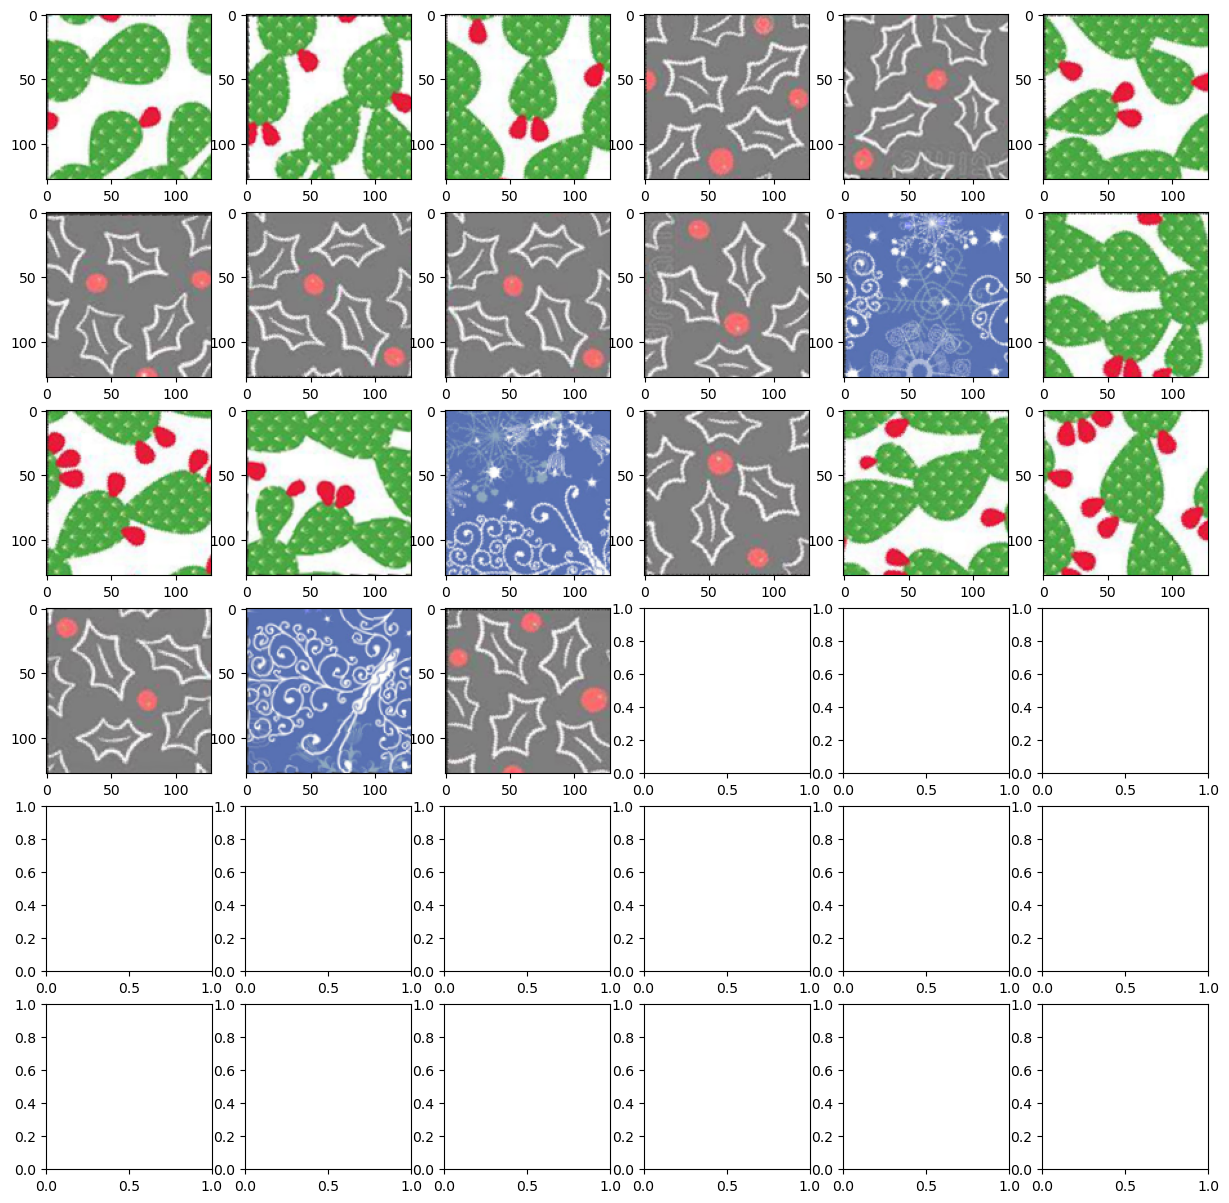

In [9]:
fig, axs = plt.subplots(6, 6, figsize=(15,15))
axs = axs.ravel()

for i, piece in enumerate(pieces):
    axs[i].imshow(piece.data)

# Feature extraction

In [10]:
import cv2
import numpy as np
from scipy.stats import kurtosis, skew


def extract_gabor_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = []
    
    # Define the parameters for the Gabor filter
    ksize = 21
    phi = 0
    
    for theta in range(8):   
        theta = theta / 4. * np.pi
        for sigma in (1, 3, 5, 7): 
            for lambd in np.arange(0, np.pi, np.pi / 4):   
                for gamma in (0.05, 0.5):   
                    # Create the Gabor kernel
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)

                    # Apply the Gabor filter to the image and get the mean response
                    filtered = cv2.filter2D(gray, cv2.CV_8UC3, kernel)
                    mean = np.mean(filtered)
                    std = np.std(filtered)
                    kurt = kurtosis(filtered, axis=None, nan_policy='omit')
                    skw = skew(filtered, axis=None, nan_policy='omit')
                    
                    features.append(mean)
                    features.append(std)
                    features.append(kurt)
                    features.append(skw)

    return features


def extract_histogram_features(image):
    b, g, r = cv2.split(image)
    
    # Compute the histogram for each color channel
    hist_b = np.histogram(b.ravel(), bins=256, range=(0, 255))[0]
    hist_g = np.histogram(g.ravel(), bins=256, range=(0, 255))[0]
    hist_r = np.histogram(r.ravel(), bins=256, range=(0, 255))[0]

    # Concatenate the histograms to create a 3D color histogram
    hist = np.concatenate([hist_r, hist_g, hist_b])

    # Normalize the histogram
    hist = hist / np.sum(hist)
    
    return hist


In [11]:
features = []

for piece in pieces:
    #features.append(piece.data.flatten())
    #features.append(extract_gabor_features(piece.data))
    features.append(extract_histogram_features(piece.data))

features = np.nan_to_num(np.array(features))

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

# Clustering

In [13]:
from sklearn.cluster import KMeans

def cluster_puzzle_pieces(features, k):
    # Perform k-means clustering on the features
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    
    # Get the cluster labels and centroids
    labels = kmeans.labels_
    
    return labels

In [14]:
labels = cluster_puzzle_pieces(principal_components, k=3)

for i, label in enumerate(labels):
    pieces[i].label = label

/opt/miniconda3/envs/iapr/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


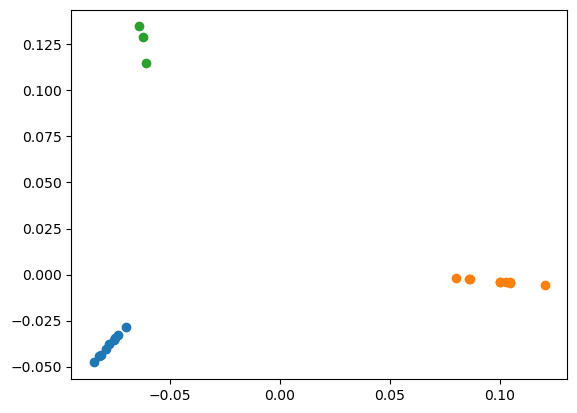

In [15]:
plt.figure()
for i in np.unique(labels):
    plt.scatter(principal_components[labels == i,0], principal_components[labels == i,1])
plt.show()

# Solve tiling puzzle

see https://arxiv.org/pdf/1811.03188.pdf

see Mahalanobis Gradient Compatibility (MGC) metric

In [16]:
# from itertools import compress

# puzzles = []
# outliers = []
# for label in np.unique(labels):
#     if (labels == label).sum() not in [9, 12, 16]:
#         outliers.extend(list(compress(pieces, labels == label)))
#     else:
#         puzzle = Puzzle(list(compress(pieces, labels == label)))
#         puzzles.append(puzzle)

In [17]:
# fig, axs = plt.subplots(1, 2, figsize=(15,15))
# axs = axs.ravel()

# for i, puzzle in enumerate(puzzles):
#     puzzle.assemble()
#     axs[i].imshow(puzzle.data)

In [18]:
from itertools import combinations
import networkx as nx
import copy


def compute_affinity(central, side, position, rotation, crop=None):
    central = copy.deepcopy(central)
    side = copy.deepcopy(side)
    side.rotate(k=rotation)
    
    if crop is not None:
        Pi = central.data[crop:-crop, crop:-crop, :].copy() / float(256)
        Pj = side.data[crop:-crop, crop:-crop, :].copy() / float(256)
    else:
        Pi = central.data.copy() / float(256)
        Pj = side.data.copy() / float(256)

    if position == 'top':
        Gi = abs(Pi[0, :, :] - Pi[1, :, :])
        Gj = abs(Pj[-1, :, :] - Pj[-2, :, :])
        Gij = abs(Pj[-1, :, :] - Pi[0, :, :])
        
    elif position == 'right':
        Gi = abs(Pi[:, -1, :] - Pi[:, -2, :])
        Gj = abs(Pj[:, 0, :] - Pj[:, 1, :])
        Gij = abs(Pj[:, 0, :] - Pi[:, -1, :])

    elif position == 'bottom':
        Gi = abs(Pi[-1, :, :] - Pi[-2, :, :])
        Gj = abs(Pj[0, :, :] - Pj[1, :, :])
        Gij = abs(Pj[0, :, :] - Pi[-1, :, :])

    elif position == 'left':
        Gi = abs(Pi[:, 0, :] - Pi[:, 1, :])
        Gj = abs(Pj[:, -1, :] - Pj[:, -2, :])
        Gij = abs(Pj[:, -1, :] - Pi[:, 0, :])

    mu_i = np.mean(Gi)
    mu_j = np.mean(Gj)

    Gi_reg = abs(Gij - mu_i)
    Gj_reg = abs(Gij - mu_j)

    cov_i = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    cov_j = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

    p1_cov_inv = np.linalg.inv(cov_i)
    p2_cov_inv = np.linalg.inv(cov_j)

    Dij = np.sqrt(np.sum(np.dot(np.dot(Gi_reg, p1_cov_inv), np.transpose(Gi_reg))))
    Dji = np.sqrt(np.sum(np.dot(np.dot(Gj_reg, p2_cov_inv), np.transpose(Gj_reg))))

    return Dij + Dji


# def add_piece(piece, solved, position):
#     if position == 'top_left':
#         solved[0] = piece
#     elif position == 'top':
#         solved[1] = piece
#     elif position == 'top_right':
#         solved[2] = piece
#     elif position == 'left':
#         solved[3] = piece
#     if position == 'center':
#         solved[4] = piece:
#     elif position == 'right':
#         solved[5] = piece
#     elif position == 'bottom_left':
#         solved[6] = piece
#     elif position == 'bottom':
#         solved[7] = piece
#     elif position == 'bottom_right':
#         solved[8] = piece


# def recursive_solver(pieces, available_pieces, center, solved, graph):
#     current = center
#     while len(available_pieces) != 0:
        
    
    # if len(available_pieces) == 0:
    #     return solved
# def compute_3x3_score(puzzle):
#     score = 0
#     score += puzzle.pieces[4].

def get_center(pieces, graph):
    center = None
    center_score = np.inf
    scores = nx.get_node_attributes(graph, 'score')
    for node, degree in graph.degree():
        if (scores[node] < center_score) and (degree == 4):
            center = node
            center_score = scores[node]
    
    if center == None:
        for node, degree in graph.degree():
            if (scores[node] < center_score) and (degree == 3):
                center = node
                center_score = scores[node]
    
    return center

def construct_cross(pieces, available_pieces, center):
    # Assign neighbors
    top, rot_top = pieces[center.top[0]], center.top[1]
    right, rot_right = pieces[center.right[0]], center.right[1]
    left, rot_left = pieces[center.left[0]], center.left[1]
    bottom, rot_bottom = pieces[center.bottom[0]], center.bottom[1]
    
    # Apply correct rotations
    top.rotate(rot_top, update_neighbors=True)
    right.rotate(rot_right, update_neighbors=True)
    bottom.rotate(rot_bottom, update_neighbors=True)
    left.rotate(rot_left, update_neighbors=True)
    
    # Construct central cross
    solved = [None] * len(pieces)
    solved[4] = center
    solved[5] = right
    solved[3] = left
    solved[1] = top
    solved[7] = bottom
    
    # Remove used pieces
    available_pieces.remove(center.top[0])
    available_pieces.remove(center.right[0])
    available_pieces.remove(center.bottom[0])
    available_pieces.remove(center.left[0])
    
    return solved, available_pieces, (rot_top,rot_right, rot_bottom, rot_left)

def add_corners(pieces, solved, rotations, available_pieces):
    top, right, bottom, left = solved[1], solved[5], solved[7], solved[3]
    rot_top, rot_right, rot_bottom, rot_left = rotations[0], rotations[1], rotations[2], rotations[3]
    
    if (top.left[0] == left.top[0]) and (top.left[0] in available_pieces):
        top_left = pieces[top.left[0]]
        top_left.rotate(rot_top + top.left[1], update_neighbors=True)
        solved[0] = top_left
        available_pieces.remove(top.left[0])
    # else:
    #     print('bad corner')
    #     candidate_1 = pieces[top.left[0]]
    #     candidate_2 = pieces[left.top[0]]
        
    #     affinity_1 = compute_affinity(top, candidate_1, 'left', rotation=rot_top+top.left[1])
    #     affinity_1 += compute_affinity(left, candidate_1, 'top', rotation=rot_top+top.left[1])
        
    #     affinity_2 = compute_affinity(top, candidate_2, 'left', rotation=rot_left + top.left[1])
    #     affinity_2 += compute_affinity(left, candidate_2, 'top', rotation=rot_left + top.left[1])
        
    #     solved[0] = candidate_1 if affinity_1 < affinity_2 else candidate_2

    if (top.right[0] == right.top[0]) and (top.right[0] in available_pieces):
        top_right = pieces[top.right[0]]
        top_right.rotate(rot_top + top.right[1], update_neighbors=True)
        solved[2] = top_right
        available_pieces.remove(top.right[0])
    # else:
    #     print('bad corner')
    #     candidate_1 = pieces[top.right[0]]
    #     candidate_2 = pieces[right.top[0]]
        
    #     affinity_1 = compute_affinity(top, candidate_1, 'right', rotation=rot_top+top.right[1])
    #     affinity_1 += compute_affinity(right, candidate_1, 'top', rotation=rot_top+top.right[1])
        
    #     affinity_2 = compute_affinity(top, candidate_2, 'right', rotation=rot_right + top.right[1])
    #     affinity_2 += compute_affinity(right, candidate_2, 'top', rotation=rot_right + top.right[1])
        
    #     solved[2] = candidate_1 if affinity_1 < affinity_2 else candidate_2
    
    if (bottom.left[0] == left.bottom[0]) and (bottom.left[0] in available_pieces):
        bottom_left = pieces[bottom.left[0]]
        bottom_left.rotate(rot_bottom + bottom.left[1], update_neighbors=True)
        solved[6] = bottom_left
        available_pieces.remove(bottom.left[0])
    # else:
    #     print('bad corner')
    #     candidate_1 = pieces[bottom.left[0]]
    #     candidate_2 = pieces[left.bottom[0]]
        
    #     affinity_1 = compute_affinity(left, candidate_1, 'bottom', rotation=rot_left+left.bottom[1])
    #     affinity_1 += compute_affinity(bottom, candidate_1, 'left', rotation=rot_left+left.bottom[1])
        
    #     affinity_2 = compute_affinity(left, candidate_2, 'bottom', rotation=rot_bottom + left.bottom[1])
    #     affinity_2 += compute_affinity(bottom, candidate_2, 'left', rotation=rot_bottom + left.bottom[1])
        
    #     solved[6] = candidate_1 if affinity_1 < affinity_2 else candidate_2

    if (bottom.right[0] == right.bottom[0]) and (bottom.right[0] in available_pieces):
        bottom_right = pieces[bottom.right[0]]
        bottom_right.rotate(rot_bottom + bottom.right[1], update_neighbors=True)
        solved[8] = bottom_right
        available_pieces.remove(bottom.right[0])
    # else:
    #     print('bad corner')
    #     candidate_1 = pieces[bottom.right[0]]
    #     candidate_2 = pieces[right.bottom[0]]
        
    #     affinity_1 = compute_affinity(right, candidate_1, 'bottom', rotation=rot_bottom+bottom.right[1])
    #     affinity_1 += compute_affinity(bottom, candidate_1, 'right', rotation=rot_bottom+bottom.right[1])
        
    #     affinity_2 = compute_affinity(right, candidate_2, 'bottom', rotation=rot_right + right.bottom[1])
    #     affinity_2 += compute_affinity(bottom, candidate_2, 'right', rotation=rot_right + right.bottom[1])
        
    #     solved[8] = candidate_1 if affinity_1 < affinity_2 else candidate_2
    
    if len(available_pieces) != 0:
        print(available_pieces)
        print('bad corner')
        return pieces
    
    return solved


def solver_3x3(puzzle, graph):
    pieces = copy.deepcopy(puzzle.pieces)
    available_pieces = list(range(len(pieces)))
    
    center = get_center(pieces, graph)
    available_pieces.remove(center)
    center = pieces[center]
    
    solved, available_pieces, (rot_top, rot_right, rot_bottom, rot_left) = construct_cross(pieces, available_pieces, center)
    solved = add_corners(pieces, solved, (rot_top, rot_right, rot_bottom, rot_left), available_pieces)
    
    return solved


def solver_3x4(puzzle, graph):
    raise NotImplementedError


def solver_4x4(puzzle, graph):
    raise NotImplementedError


class Puzzle:
    def __init__(self, pieces):
        if len(pieces) not in [9, 12, 16]:
            raise ValueError(f'Invalid number of pieces, puzzle should be composed of 9, 12 or 16 pieces but got {len(pieces)} pieces.')
        
        self.pieces = pieces
        
        if len(pieces) == 9:
            self.data = np.zeros((384, 384, 3), dtype=pieces[0].data.dtype)
            self.size = (3, 3)
        
        elif len(pieces) == 12:
            self.data = np.zeros((384, 512, 3), dtype=pieces[0].data.dtype)
            self.size = (3, 4)
        
        elif len(pieces) == 16:
            self.data = np.zeros((512, 512, 3), dtype=pieces[0].data.dtype)
            self.size = (4, 4)
    
    def init_affinities(self, crop=None):
        pairs = list(combinations(range(len(self.pieces)), 2))
        permuted = [(pair[1], pair[0]) for pair in pairs]
        pairs.extend(permuted)

        for pair in pairs:
            central = self.pieces[pair[0]]
            side = self.pieces[pair[1]]
            
            for rotation in [0, 1, 2, 3]:
                top_affinity = compute_affinity(central, side, 'top', rotation, crop=crop)
                right_affinity = compute_affinity(central, side, 'right', rotation, crop=crop)
                bottom_affinity = compute_affinity(central, side, 'bottom', rotation, crop=crop)
                left_affinity = compute_affinity(central, side, 'left', rotation, crop=crop)
                
                if top_affinity < central.top_affinity:
                    central.top_affinity = top_affinity
                    central.top = (pair[1], rotation)
                
                if right_affinity < central.right_affinity:
                    central.right_affinity = right_affinity
                    central.right = (pair[1], rotation)
                
                if bottom_affinity < central.bottom_affinity:
                    central.bottom_affinity = bottom_affinity
                    central.bottom = (pair[1], rotation)
                
                if left_affinity < central.left_affinity:
                    central.left_affinity = left_affinity
                    central.left = (pair[1], rotation)
        
        for piece in self.pieces:
            piece.score = piece.top_affinity + piece.right_affinity + piece.bottom_affinity + piece.left_affinity
    
    def get_undirected_graph(self):
        directed_graph = nx.DiGraph()
        for i, piece in enumerate(self.pieces):
            directed_graph.add_node(i, score=piece.score)
        
        for i, piece in enumerate(self.pieces):
            directed_graph.add_edge(i, piece.top[0])
            directed_graph.add_edge(i, piece.right[0])
            directed_graph.add_edge(i, piece.bottom[0])
            directed_graph.add_edge(i, piece.left[0])
            
        undirected_graph = nx.Graph()
        for i, piece in enumerate(self.pieces):
            undirected_graph.add_node(i, score=piece.score)
            
        for edge in directed_graph.edges():
            u, v = edge

            # Check if both (u, v) and (v, u) exist in the directed graph
            if directed_graph.has_edge(u, v) and directed_graph.has_edge(v, u):
                undirected_graph.add_edge(u, v)
        
        return undirected_graph
    
    def solve(self):
        self.init_affinities()
        G = self.get_undirected_graph()
        
        if self.size == (3, 3):
            self.pieces = solver_3x3(self, G)
        elif self.size == (3, 4):
            self.pieces = solver_3x4(self, G)
        elif self.size == (4, 4):
            self.pieces = solver_4x4(self, G)
    
    def assemble(self):
        for idx, piece in enumerate(self.pieces):
            i = idx // self.size[0]
            j = idx % self.size[1]
            self.data[128*i:128*(i+1), 128*j:128*(j+1), :] = piece.data
    
    def random_permutation(self):
        self.pieces = np.random.permutation(self.pieces)
    
    def random_rotations(self):
        for piece in self.pieces:
            piece.rotate(np.random.randint(4))
            piece.original = piece.data.copy()

In [19]:
puzzle_3x3 = [
    'solution_00_00.png',
    'solution_00_01.png',
    'solution_00_02.png',
    'solution_01_00.png',
    'solution_02_00.png',
    'solution_03_00.png',
    'solution_03_01.png',
    'solution_04_00.png',
    'solution_05_01.png',
    'solution_05_02.png',
    'solution_06_00.png',
    'solution_07_00.png',
    'solution_07_01.png',
    'solution_09_02.png',
    'solution_11_00.png',
    'solution_11_01.png'
]

[2, 5, 6, 8]
bad corner


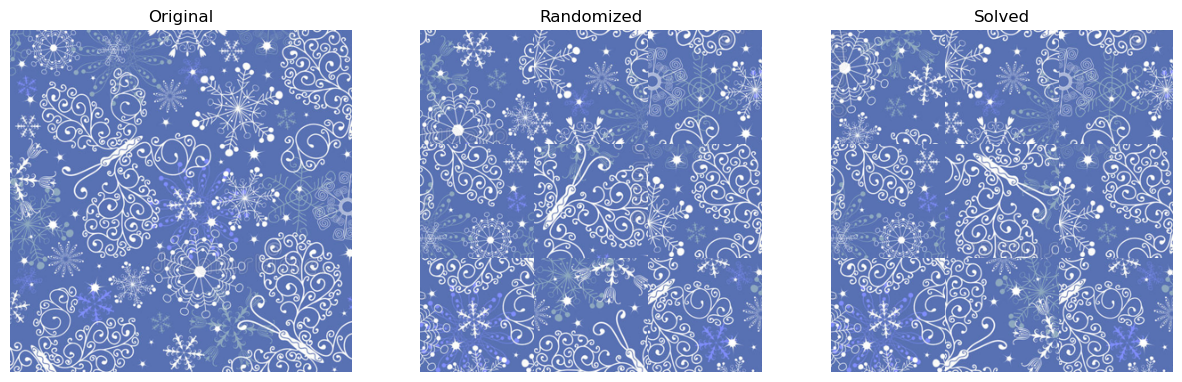

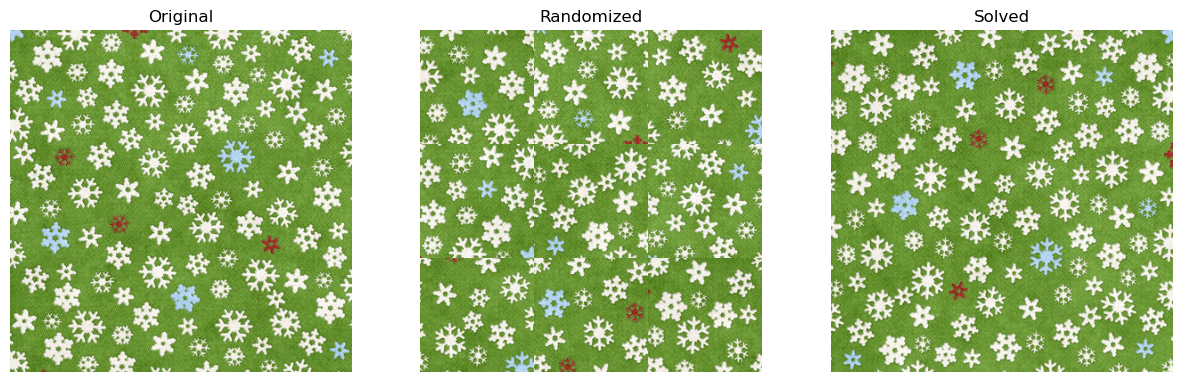

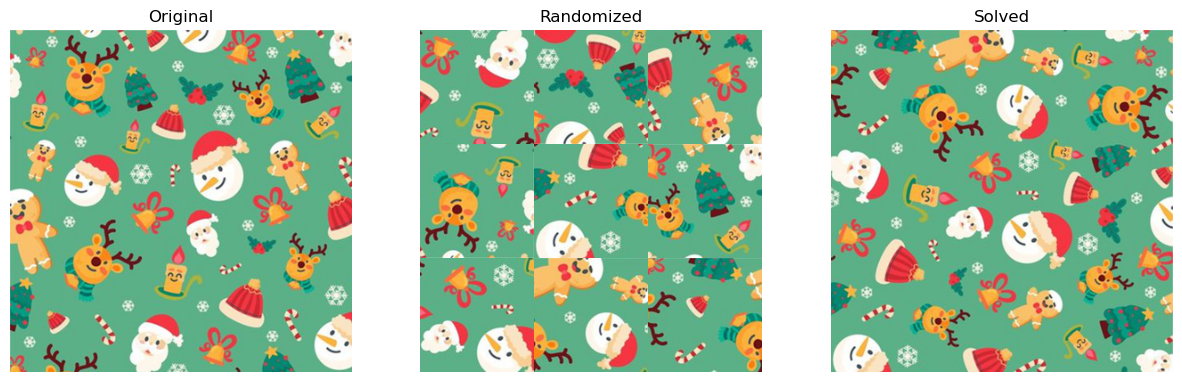

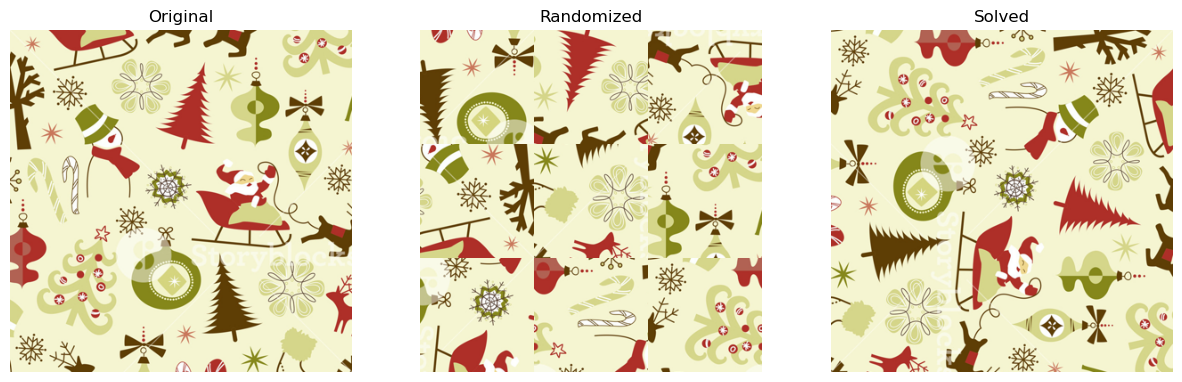

[3]
bad corner


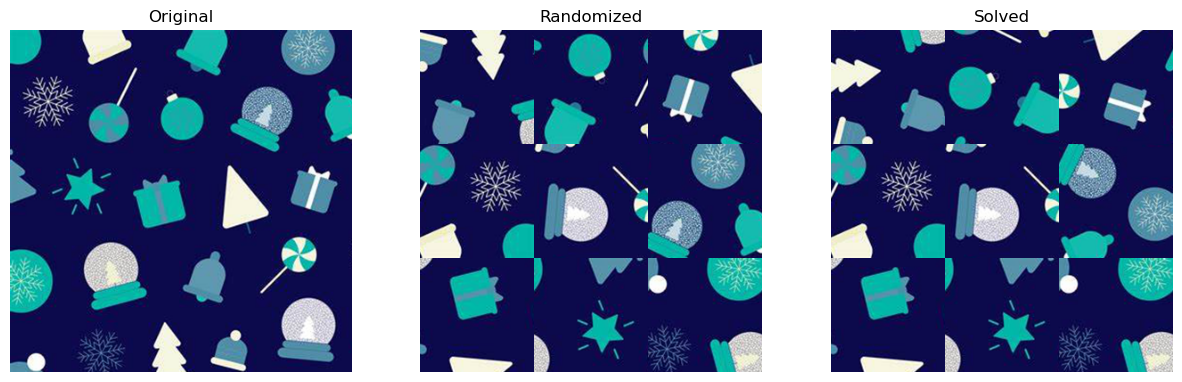

ValueError: list.remove(x): x not in list

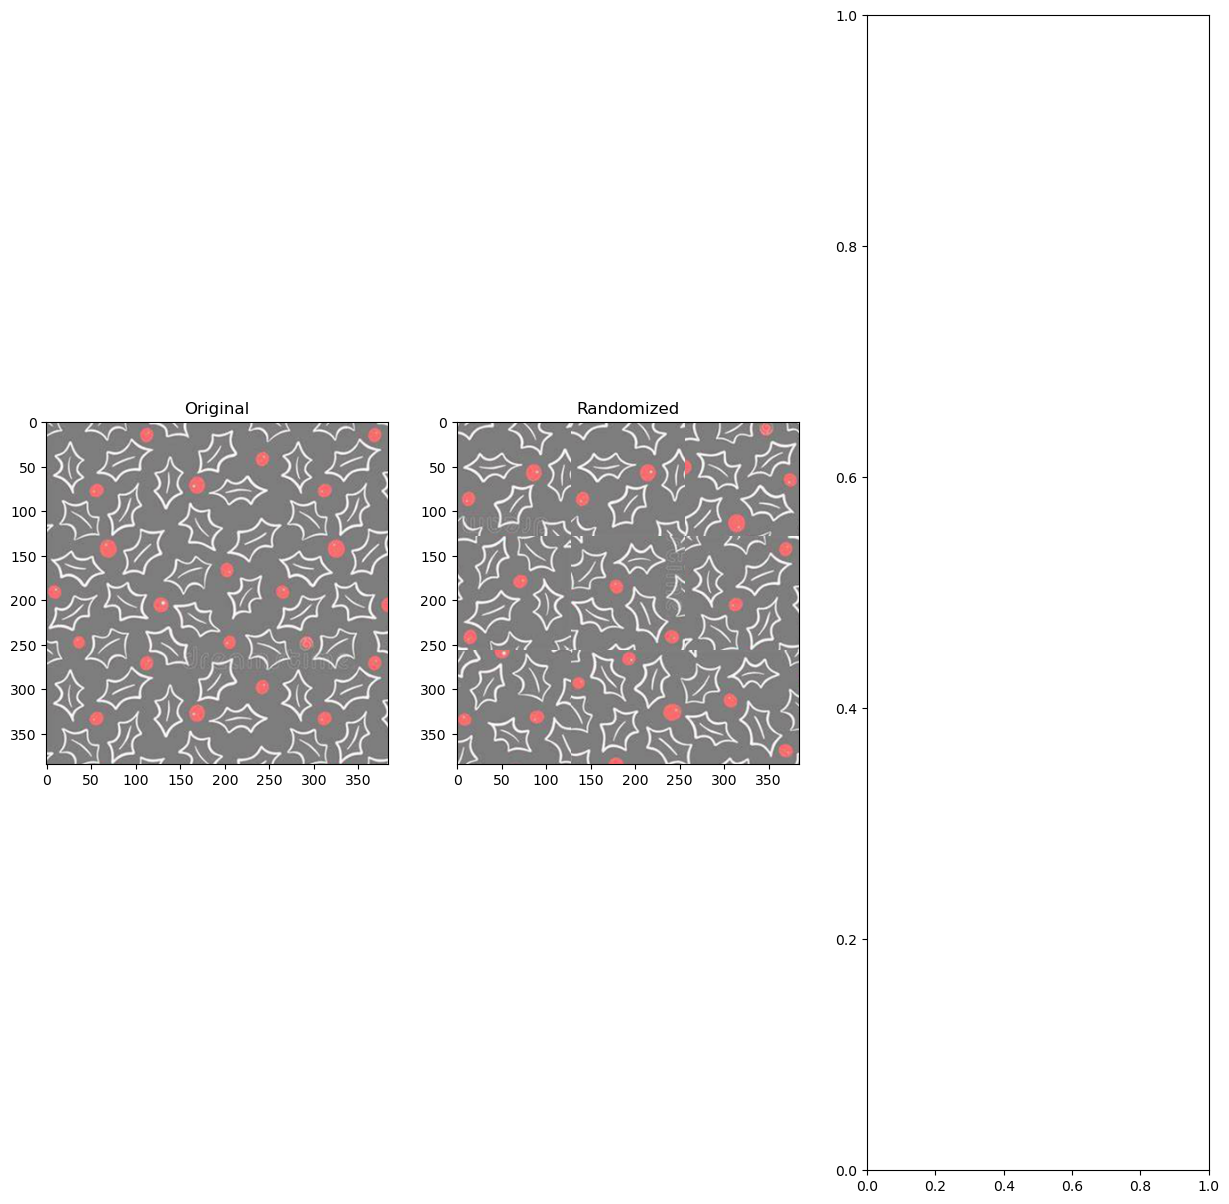

In [20]:
for id, file_name in enumerate(puzzle_3x3):
    fig, axs = plt.subplots(1, 3, figsize=(15,15))
    axs = axs.ravel()
    
    im = Image.open(os.path.join('data_project','train2_solutions',file_name)).convert('RGB')
    im = np.array(im)

    
    axs[0].imshow(im)
    axs[0].set_title('Original')

    #im = cv2.medianBlur(im, 5)

    pieces = []
    for idx in range(9):
        i = idx // 3
        j = idx % 3
        piece = Piece(data=im[128*i:128*(i+1), 128*j:128*(j+1), :]) 
        pieces.append(piece)

    puzzle = Puzzle(pieces)
    np.random.seed(42)
    puzzle.random_permutation()
    puzzle.random_rotations()
    puzzle.assemble()
    axs[1].imshow(puzzle.data)
    axs[1].set_title('Randomized')


    puzzle.solve()
    puzzle.assemble()
    axs[2].imshow(puzzle.data)
    axs[2].set_title('Solved')
    
    [a.axis('off') for a in axs.ravel()]
    plt.show()

